In [1]:
import vice
import arya
import matplotlib.pyplot as plt
import pandas as pd
from surp import ViceModel
import numpy as np

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
ls ../../models/C11_f0.2

27763822.out  27857541.out    model.json   stars.csv
27825690.out  27860053.out    params.json  stars_gaussian_walks.dat
27827724.out  milkyway.vice/  run.py       yield_params.json


In [3]:
walks = pd.read_csv("../../models/C11_f0.2/stars_gaussian_walks.dat", memory_map=True) # requires a bit of memory

In [4]:
t_end = np.max(walks.t)

In [5]:
t_end

13.18

In [6]:
walks.set_index(["N", "t"], inplace=True) # multiindex makes this much easier...

In [7]:
df_end = walks.xs(t_end, level="t")

In [8]:
df_end.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       132649, 132650, 132651, 132652, 132653, 132654, 132655, 132656, 132657,
       132658],
      dtype='int64', name='N', length=132000)

In [9]:
Ns = df_end.index.values # last slice contains every value

In [10]:
t_birth = np.empty(len(Ns))
Ri = np.zeros(len(Ns))
Rf = np.zeros(len(Ns))
for i, n in enumerate(Ns):
    print(f"{n} / {Ns[-1]}", end="\r")
    ws = walks.loc[n, :]
    t_birth[i] = ws.index[0]
    Rf[i] = ws.R[t_end]
    Ri[i] = ws.R[t_birth[i]]
    
dR = Rf - Ri

Text(0, 0.5, 'density')

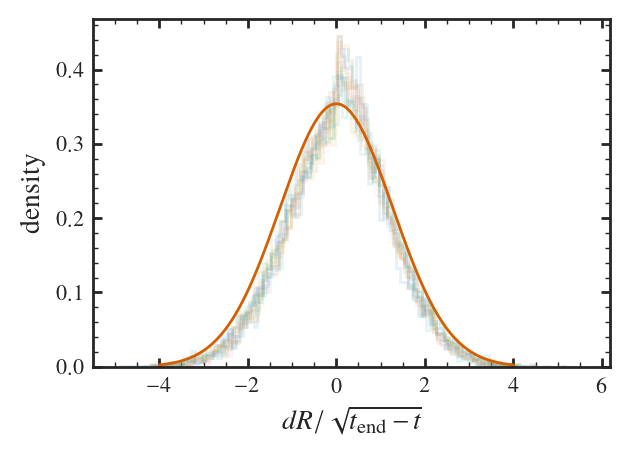

In [11]:
for t in np.arange(0, 13.0):
    dt = 0.5
    filt = t_birth > t - dt
    filt &= t_birth < t + dt
    plt.hist(dR[filt]/np.sqrt(13.2 - t_birth[filt]), 100, histtype="step", density=True, alpha=0.1)
    
x = np.linspace(-4, 4, 1000)
σ = 1.27
y = 1/np.sqrt(2*np.pi * σ) * np.exp(-x**2 / (2*σ**2))
plt.plot(x, y)
plt.xlabel(r"$dR / \sqrt{t_{\rm  end} - t}$")
plt.ylabel("density")

all time bins appear to be well approximated by the gaussian (yay). The overabundance at 0 is likely due to boundry conditions (r=0 and r=20).

Text(0, 0.5, 'dr')

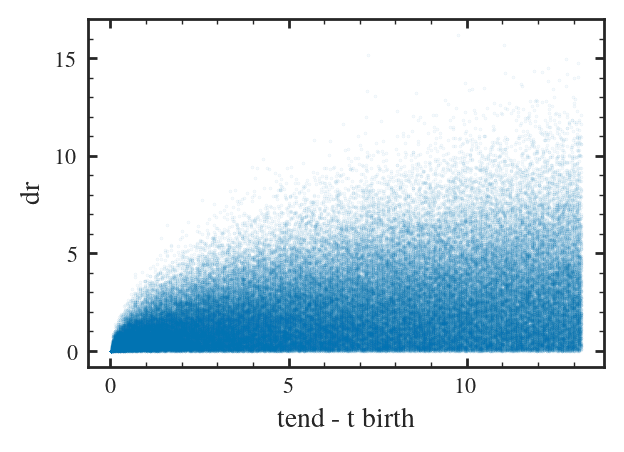

In [12]:
plt.scatter(13.2 - t_birth, np.abs(dR), s=0.05, alpha=0.1)
plt.xlabel("tend - t birth")
plt.ylabel('dr')

In [13]:
z0 = 2
dz = 0.1
filt = Ri > z0 - dz
filt &= Ri <= z0 + dz

In [14]:
idx = Ns[filt]

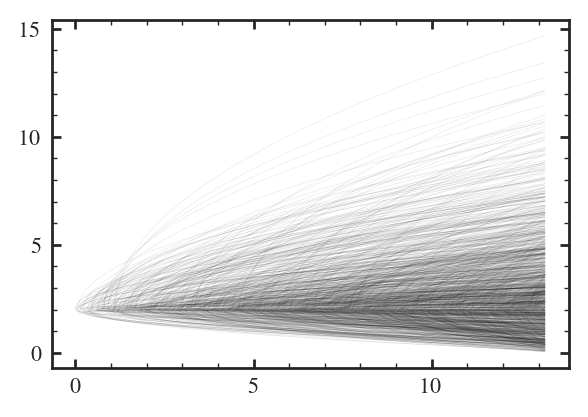

In [15]:
for N in idx:
    w = walks.loc[N, :]
    plt.plot(w.index, w.R, lw=0.2, alpha=0.1, color="k")
    


In [16]:
mig = vice.toolkit.gaussian.gaussian_stars(np.linspace(0, 20, 10))

In [17]:
a = [mig._gaussian_stars__c_version.delta_R(13) for i in range(1000)]

In [18]:
mig.get_r_birth(34)

16.01349693847828

(array([  7.,  40., 120., 164., 269., 223., 128.,  41.,   7.,   1.]),
 array([-14.3162894 , -11.24116119,  -8.16603298,  -5.09090476,
         -2.01577655,   1.05935167,   4.13447988,   7.2096081 ,
         10.28473631,  13.35986453,  16.43499274]),
 <BarContainer object of 10 artists>)

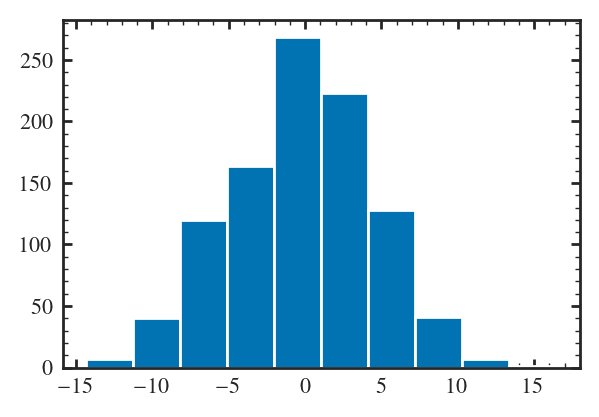

In [19]:
plt.hist(a)